In [2]:
import pandas as pd

train = pd.read_csv('./Data/train.csv')
test = pd.read_csv('./Data/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


survived: 0 no, 1 yes  
pbclass: Ticket class 1st, 2nd, 3rd  
sibsp: # of siblings on titanic  
parch: # of parents / children on titanic  
ticket: Ticket number  
cabin: Cabin number  
embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton  

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.shape

(891, 12)

In [10]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Some missing data in age, cabin, embarked

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [42]:
def bar_chart(feature):
    if not feature in train:
        print("Incorrect key")
        return
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train["Survived"] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ["Survived", "Dead"]
    df.plot(kind="bar",stacked=True, figsize=(10, 5))

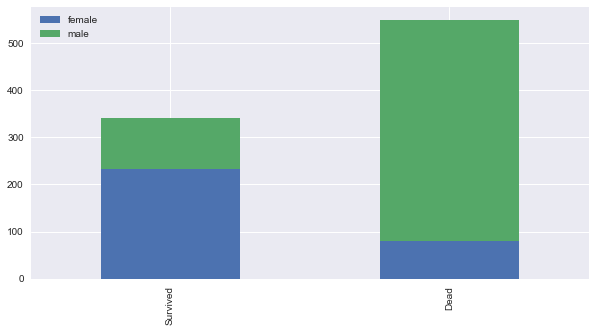

In [24]:
bar_chart("Sex")

Woman more likely to survive than men are

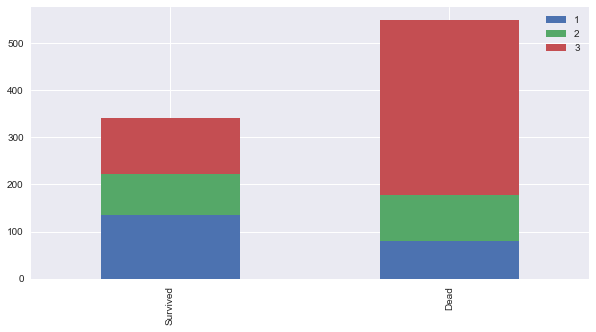

In [25]:
bar_chart("Pclass")

More 3rd class people died in raw numbers

In [39]:
print("1st ratio: ", train[train["Pclass"] == 1]["Pclass"].count()/(train["Pclass"].count()))
print("2nd ratio: ", train[train["Pclass"] == 2]["Pclass"].count()/(train["Pclass"].count()))
print("3rd ratio: ", train[train["Pclass"] == 3]["Pclass"].count()/(train["Pclass"].count()))

1st ratio:  0.24242424242424243
2nd ratio:  0.20650953984287318
3rd ratio:  0.5510662177328844


In [40]:
print("1st survived: ", train[(train["Pclass"] == 1) & (train["Survived"] == 1)]["Pclass"].count()/(train["Pclass"].count()))
print("2nd survived: ", train[(train["Pclass"] == 2) & (train["Survived"] == 1)]["Pclass"].count()/(train["Pclass"].count()))
print("3rd survived: ", train[(train["Pclass"] == 3) & (train["Survived"] == 1)]["Pclass"].count()/(train["Pclass"].count()))

1st survived:  0.1526374859708193
2nd survived:  0.09764309764309764
3rd survived:  0.1335578002244669


People in first class more likely to survive

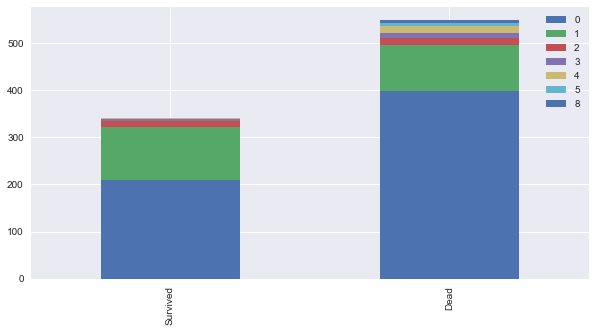

In [43]:
bar_chart("SibSp")

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
